<a href="https://colab.research.google.com/github/suajeong52/collapsible_tube/blob/main/try_1(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install sciann

In [3]:
import numpy as np 
import sciann as sn 
import matplotlib.pyplot as plt  
from numpy import pi
from sciann.utils.math import diff, sign, sin, sqrt, pow

---------------------- SCIANN 0.6.6.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.3 
Python Version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0] 



In [4]:
x = sn.Variable('x')
t = sn.Variable('t')
u = sn.Functional('u', [x,t], 8*[20], 'tanh')
A = sn.Functional('A', [x,t], 8*[20], 'tanh')

In [5]:
L1 = diff(A, t) + u*diff(A,x) + A * diff(u, x) 

In [6]:
rho = 1
beta =200

L2 = diff(u, t) + u*diff(u,x) + beta/(2*rho*sn.pow(A*A+0.01,0.25) ) * diff(A, x, order=1)

In [7]:
TOL = 0.001
T = 10
omega = 2*np.pi/T
C1 = (1-sign(t - TOL)) * (u -0)
C2 = (1-sign(t - TOL)) * (A-1)
C3 = (1-sign(x - TOL)) * (u -sin(omega*t))

In [8]:
m = sn.SciModel([x, t], [L1,L2, C1, C2, C3])

In [9]:
x_data, t_data = np.meshgrid(
    np.linspace(0, 50, 100), 
    np.linspace(0, 120, 100)
)

In [10]:
h = m.train([x_data, t_data], 5*['zero'], learning_rate=0.002, epochs=1000, verbose=1)


Total samples: 10000 
Batch size: 64 
Total batches: 157 

Epoch 1/1000
157/157 [==============================] - 9s 25ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.1132 - add_2_loss: 0.0017 - add_5_loss: 7.9843 - mul_7_loss: 5.4059e-04 - mul_8_loss: 0.1034 - mul_10_loss: 0.0230 - lr: 0.0020 - time: 8.6740
Epoch 2/1000
157/157 [==============================] - 4s 24ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.2552 - add_2_loss: 7.7831e-05 - add_5_loss: 0.1121 - mul_7_loss: 3.4318e-04 - mul_8_loss: 0.1215 - mul_10_loss: 0.0212 - lr: 0.0020 - time: 3.8417
Epoch 3/1000
157/157 [==============================] - 4s 25ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.1779 - add_2_loss: 6.6844e-05 - add_5_loss: 0.0414 - mul_7_loss: 2.2245e-04 - mul_8_loss: 0.1157 - mul_10_loss: 0.0205 - lr: 0.0020 - time: 3.9376
Epoch 4/1000
157/157 [==============================] - 4s 23ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.1537 - add_2_loss: 8.9841e-05 - add_5_loss: 0.0189 - mu

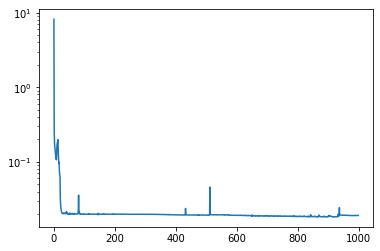

In [24]:
plt.semilogy(h.history['loss'])

In [50]:
h.history.keys()

dict_keys(['loss', 'add_2_loss', 'add_5_loss', 'mul_7_loss', 'mul_8_loss', 'mul_10_loss', 'lr', 'time'])

<function matplotlib.pyplot.show>

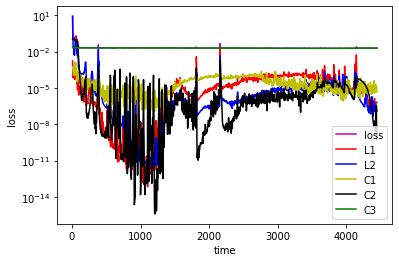

In [53]:
time = np.cumsum(h.history['time'])
plt.semilogy(time, h.history['loss'],'m')
plt.semilogy(time, h.history['add_2_loss'],'r')
plt.semilogy(time, h.history['add_5_loss'],'b')
plt.semilogy(time, h.history['mul_7_loss'],'y')
plt.semilogy(time, h.history['mul_8_loss'],'k')
plt.semilogy(time, h.history['mul_10_loss'],'g')
plt.legend(['loss', 'L1','L2','C1','C2', 'C3'])
plt.xlabel('time')
plt.ylabel('loss')
plt.show